In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
df.shape

(1436, 11)

In [9]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [11]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [15]:
df.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [17]:
dataframe_toyota = df.drop([ 'Fuel_Type'], axis =1)

In [19]:
dataframe_toyota.shape

(1436, 10)

In [21]:
dataframe_toyota.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [23]:
dataframe_toyota .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Automatic  1436 non-null   int64
 5   cc         1436 non-null   int64
 6   Doors      1436 non-null   int64
 7   Cylinders  1436 non-null   int64
 8   Gears      1436 non-null   int64
 9   Weight     1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


In [25]:
dataframe_toyota.head(10)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
5,12950,32,61000,90,0,2000,3,4,5,1170
6,16900,27,94612,90,0,2000,3,4,5,1245
7,18600,30,75889,90,0,2000,3,4,5,1245
8,21500,27,19700,192,0,1800,3,4,5,1185
9,12950,23,71138,69,0,1900,3,4,5,1105


C:\Users\Bharath Yadav\AppData\Local\Temp\ipykernel_17688\492835238.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_toyota ['Price'])


<Axes: xlabel='Price', ylabel='Density'>

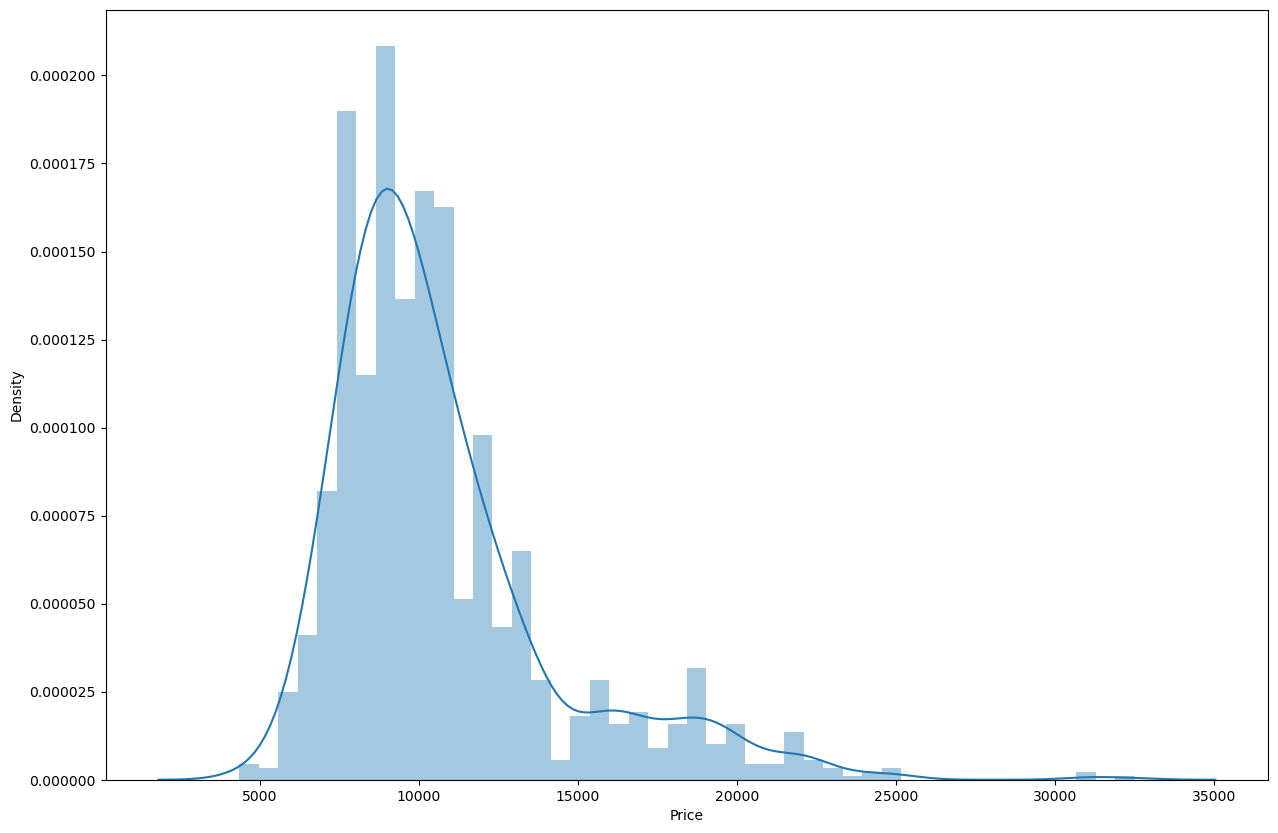

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataframe_toyota ['Price'])

C:\Users\Bharath Yadav\AppData\Local\Temp\ipykernel_17688\1401323190.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_toyota['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

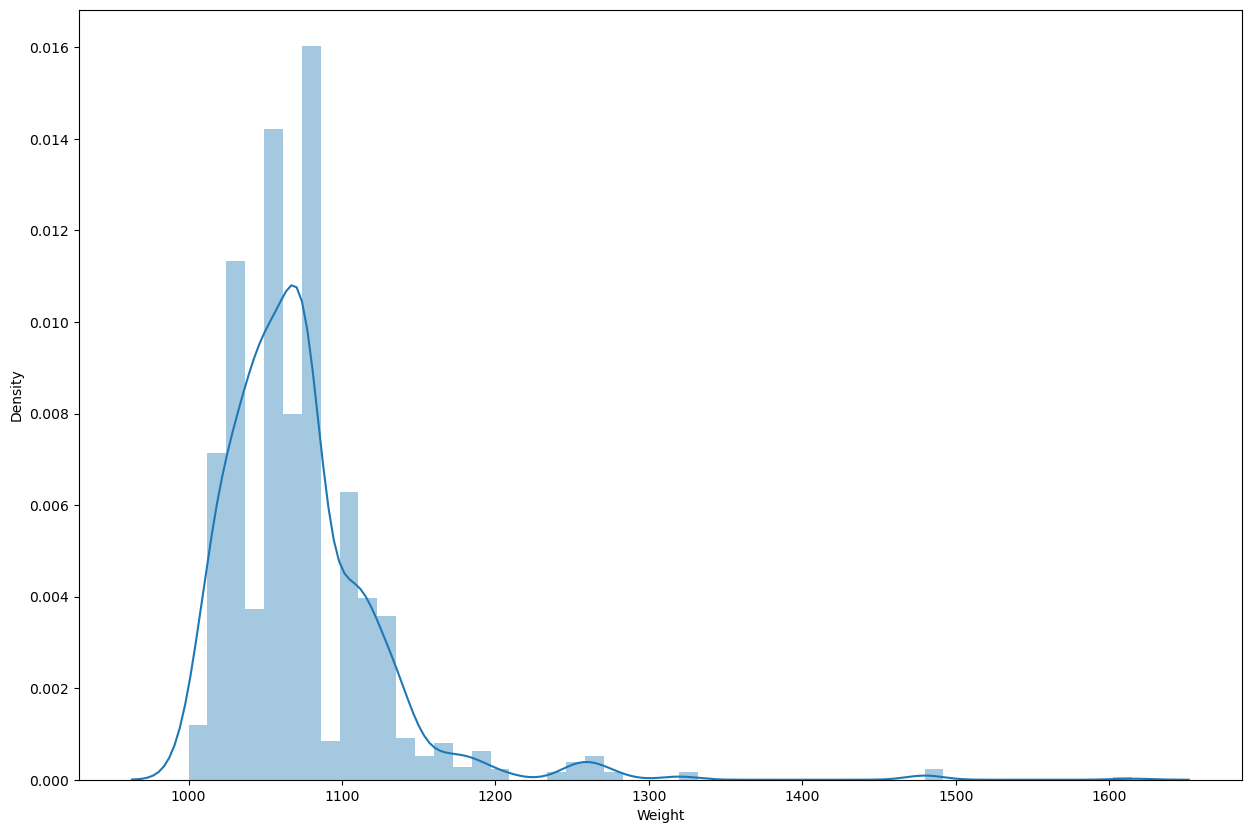

In [28]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataframe_toyota['Weight'])

In [31]:
X = dataframe_toyota.iloc[:,dataframe_toyota.columns != 'Price']
Y = dataframe_toyota.iloc[:, 0]



In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [35]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

            Coefficient
Age_08_04 -1.228170e+02
KM        -1.770189e-02
HP         2.620169e+01
Automatic  2.183030e+02
cc        -1.256136e+00
Doors     -3.011168e+01
Cylinders -4.405365e-13
Gears      7.157915e+02
Weight     2.220964e+01


In [39]:
model.intercept_

-9163.922737164485

In [41]:
y_pred = model.predict(X_test)

In [43]:
df_tot = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_tot.head(20)

,Actual,Predicted
651,7950,8239.707601
411,10950,10483.548543
342,14950,12945.238994
1298,7500,7677.337043
483,9900,10528.625924
1017,8900,9546.067333
1063,6950,6051.236027
31,15750,16213.212597
467,11950,11285.520268
477,9930,10518.172141


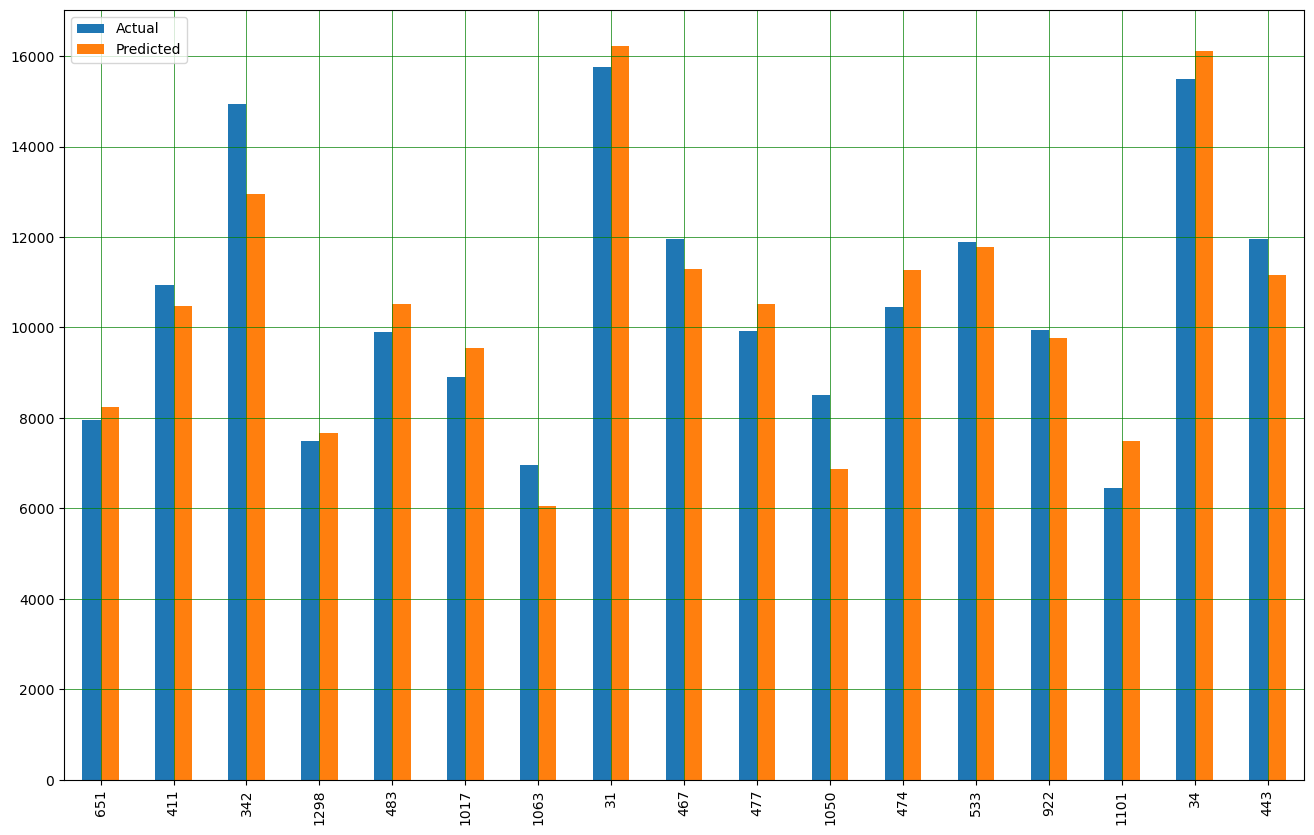

In [66]:
df_tot.head(17).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [84]:
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)
print(f"MAE: {mae}")
print(f"MSE: {mse}")



Intercept: 
 -9163.922737164485
Root Mean Square Error 
 1794.0671145520912
R^2 Value: 
 0.7413115275215343
MAE: 1079.4007166096494
MSE: 3218676.8115172666


In [45]:
ridge = Ridge(alpha=1.0)  # Alpha is the regularization parameter
ridge.fit(X_train, Y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

In [47]:
# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(Y_test, y_pred_ridge)
ridge_mse = mean_squared_error(Y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R²: {ridge_r2}")

Ridge Regression Results:
MAE: 1079.355374574998
MSE: 3221948.397965212
RMSE: 1794.9786622590286
R²: 0.7410485866454041


In [106]:
lasso = Lasso(alpha=1.0)  # Alpha is the regularization parameter
lasso.fit(X_train, Y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
lasso_mae = mean_absolute_error(Y_test, y_pred_lasso)
lasso_mse = mean_squared_error(Y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print(f"R²: {lasso_r2}")

Lasso Regression Results:
MAE: 1079.523752333008
MSE: 3228639.847036761
RMSE: 1796.8416310395196
R²: 0.7405107877794874


In [49]:
# Beta0 has x0=1. Add a column of for the the first term of the #MultiLinear Regression equation.
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm1
#The 0th column contains only 1 in each 50 rows
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [1,2,3,4,5,6,7,8]]
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable,
#exog is the number of observations
regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     926.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:32:15   Log-Likelihood:                -12577.
No. Observations:                1436   AIC:                         2.517e+04
Df Residuals:                    1428   BIC:                         2.521e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -151.3517      2.622    -57.726      0.000    -156.495    -146.209
x2            -0.0129      0.001     -9.469      0.000      -0.016      -0.010
x3            31.7835      2.998     10.600      0.000      25.902      37.665
x4           756.4928    180.734      4.186      0.000     401.960    1111.025
x5             0.4338      0.099      4.383      0.000       0.240       0.628
x6           220.6266     44.393      4.970      0.000     133.544     307.709
const       2681.2895    292.769      9.158      0.000    2106.986    3255.593
x7           898.5367    227.451      3.950      0.000     452.364    1344.710
==============================================================================
Omnibus:                      418.888   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3353.084
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                      10.138   Cond. No.                     7.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [2,3,4,5,6,7,8]]

regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1067.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:35:05   Log-Likelihood:                -12585.
No. Observations:                1436   AIC:                         2.518e+04
Df Residuals:                    1429   BIC:                         2.522e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -151.7407      2.633    -57.621      0.000    -156.906    -146.575
x2            -0.0124      0.001     -9.108      0.000      -0.015      -0.010
x3            34.6846      2.922     11.871      0.000      28.953      40.416
x4           684.1809    180.721      3.786      0.000     329.674    1038.688
x5             0.4386      0.099      4.409      0.000       0.243       0.634
x6           186.8403     43.784      4.267      0.000     100.953     272.727
const       3767.1994    101.281     37.196      0.000    3568.524    3965.874
==============================================================================
Omnibus:                      406.924   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3121.455
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                       9.878   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [1,2,3,4,5,7]]

regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1561.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:36:24   Log-Likelihood:                -12601.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1431   BIC:                         2.524e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7872.5168    188.314     41.805      0.000    7503.115    8241.919
x1          7872.5168    188.314     41.805      0.000    7503.115    8241.919
x2          -152.3291      2.622    -58.105      0.000    -157.472    -147.186
x3            -0.0128      0.001     -9.345      0.000      -0.015      -0.010
x4            35.4729      2.941     12.061      0.000      29.704      41.242
x5             0.4963      0.100      4.967      0.000       0.300       0.692
==============================================================================
Omnibus:                      399.614   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.899
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       9.573   Cond. No.                     9.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [1,2,4,5,7,8]]

regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1396.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:36:59   Log-Likelihood:                -12665.
No. Observations:                1436   AIC:                         2.534e+04
Df Residuals:                    1431   BIC:                         2.537e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9759.3126    111.359     87.638      0.000    9540.867    9977.758
x1          9759.3126    111.359     87.638      0.000    9540.867    9977.758
x2          -152.3192      2.754    -55.299      0.000    -157.722    -146.916
x3            -0.0173      0.001    -12.590      0.000      -0.020      -0.015
x4           614.4803    190.863      3.219      0.001     240.079     988.882
x5             0.5599      0.105      5.351      0.000       0.355       0.765
==============================================================================
Omnibus:                      439.946   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3460.971
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                      10.215   Cond. No.                     7.81e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [2,3,4,5,7,8]]

regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1959.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:37:31   Log-Likelihood:                -12636.
No. Observations:                1436   AIC:                         2.528e+04
Df Residuals:                    1432   BIC:                         2.530e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5167.8633    113.017     45.726      0.000    4946.167    5389.560
x1          5167.8633    113.017     45.726      0.000    4946.167    5389.560
x2          5167.8633    113.017     45.726      0.000    4946.167    5389.560
x3          -165.7594      2.311    -71.739      0.000    -170.292    -161.227
x4            43.8435      2.868     15.290      0.000      38.218      49.469
x5           911.5006    185.015      4.927      0.000     548.571    1274.431
==============================================================================
Omnibus:                      376.967   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2893.913
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       9.658   Cond. No.                     7.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
df_tot = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_tot.head(20)

,Actual,Predicted
651,7950,8239.707601
411,10950,10483.548543
342,14950,12945.238994
1298,7500,7677.337043
483,9900,10528.625924
1017,8900,9546.067333
1063,6950,6051.236027
31,15750,16213.212597
467,11950,11285.520268
477,9930,10518.172141
